# Word Occurence within Document

This page will walk you through using Textractor to find all the occurences of the word 'Room' in a document and visualize them overlayed on the document image.

### Imports

For most usages it is sufficient to import the Textractor class that is used to call the Textract API.

In [1]:
import os
from textractor import Textractor

/opt/anaconda3/envs/textractor-env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Initialize Textractor 
To initialize Textractor, simply pass your profile-name as defined in your ~/.aws/config file. As a general rule of thumb, if you are able to use `awscli` or `boto3` on your machine then these should already be properly setup. For more information on setting up credentials, you can read this [page](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-quickstart.html) on the matter.

Additional parameters can be passed to the function to store output on the S3 bucket.

In [2]:
extractor = Textractor(aws_profile_name='default')

### Calling Textract 

Unlike boto3, textractor does not return the verbose JSON response to the user. The `extractor` object internally creates a boto3 client with the credentials attached to the aws_profile_name, ingests the JSON response and converts it into a [`Document` object](/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.document). Should you still need the JSON response, it can be accessed using the `document.response` property.

In [3]:
document = extractor.detect_document_text(file_source=os.path.join(os.getcwd(), 'tests/fixtures/tutorial.pdf'), save_image=True)

We now have a `Document` object that we can use for further processing.

### Retrieve word occurences

While we strive to have most accurate OCR output possible, sometimes the output will have small one letter mistakes. Fortunately, this library uses fuzzy matching. You can search for `Word` and `Line` objects at the document and page level by calling the `search_word()` and `search_line()` methods respectively.

In [4]:
word_occurences = document.search_word(keyword='Room', top_k=15, similarity_threshold=0.5)

In [5]:
print("Number of occurences of the word Room in the document = ", len(word_occurences))

Number of occurences of the word Room in the document=  10


### Find words on document page through visualize()
To identify the location of these words on the document, `visualize()` method can be called on the object returned by the `search_word()` call. This returns an image of the page that contains the word instances identified by the `search_word()` method.

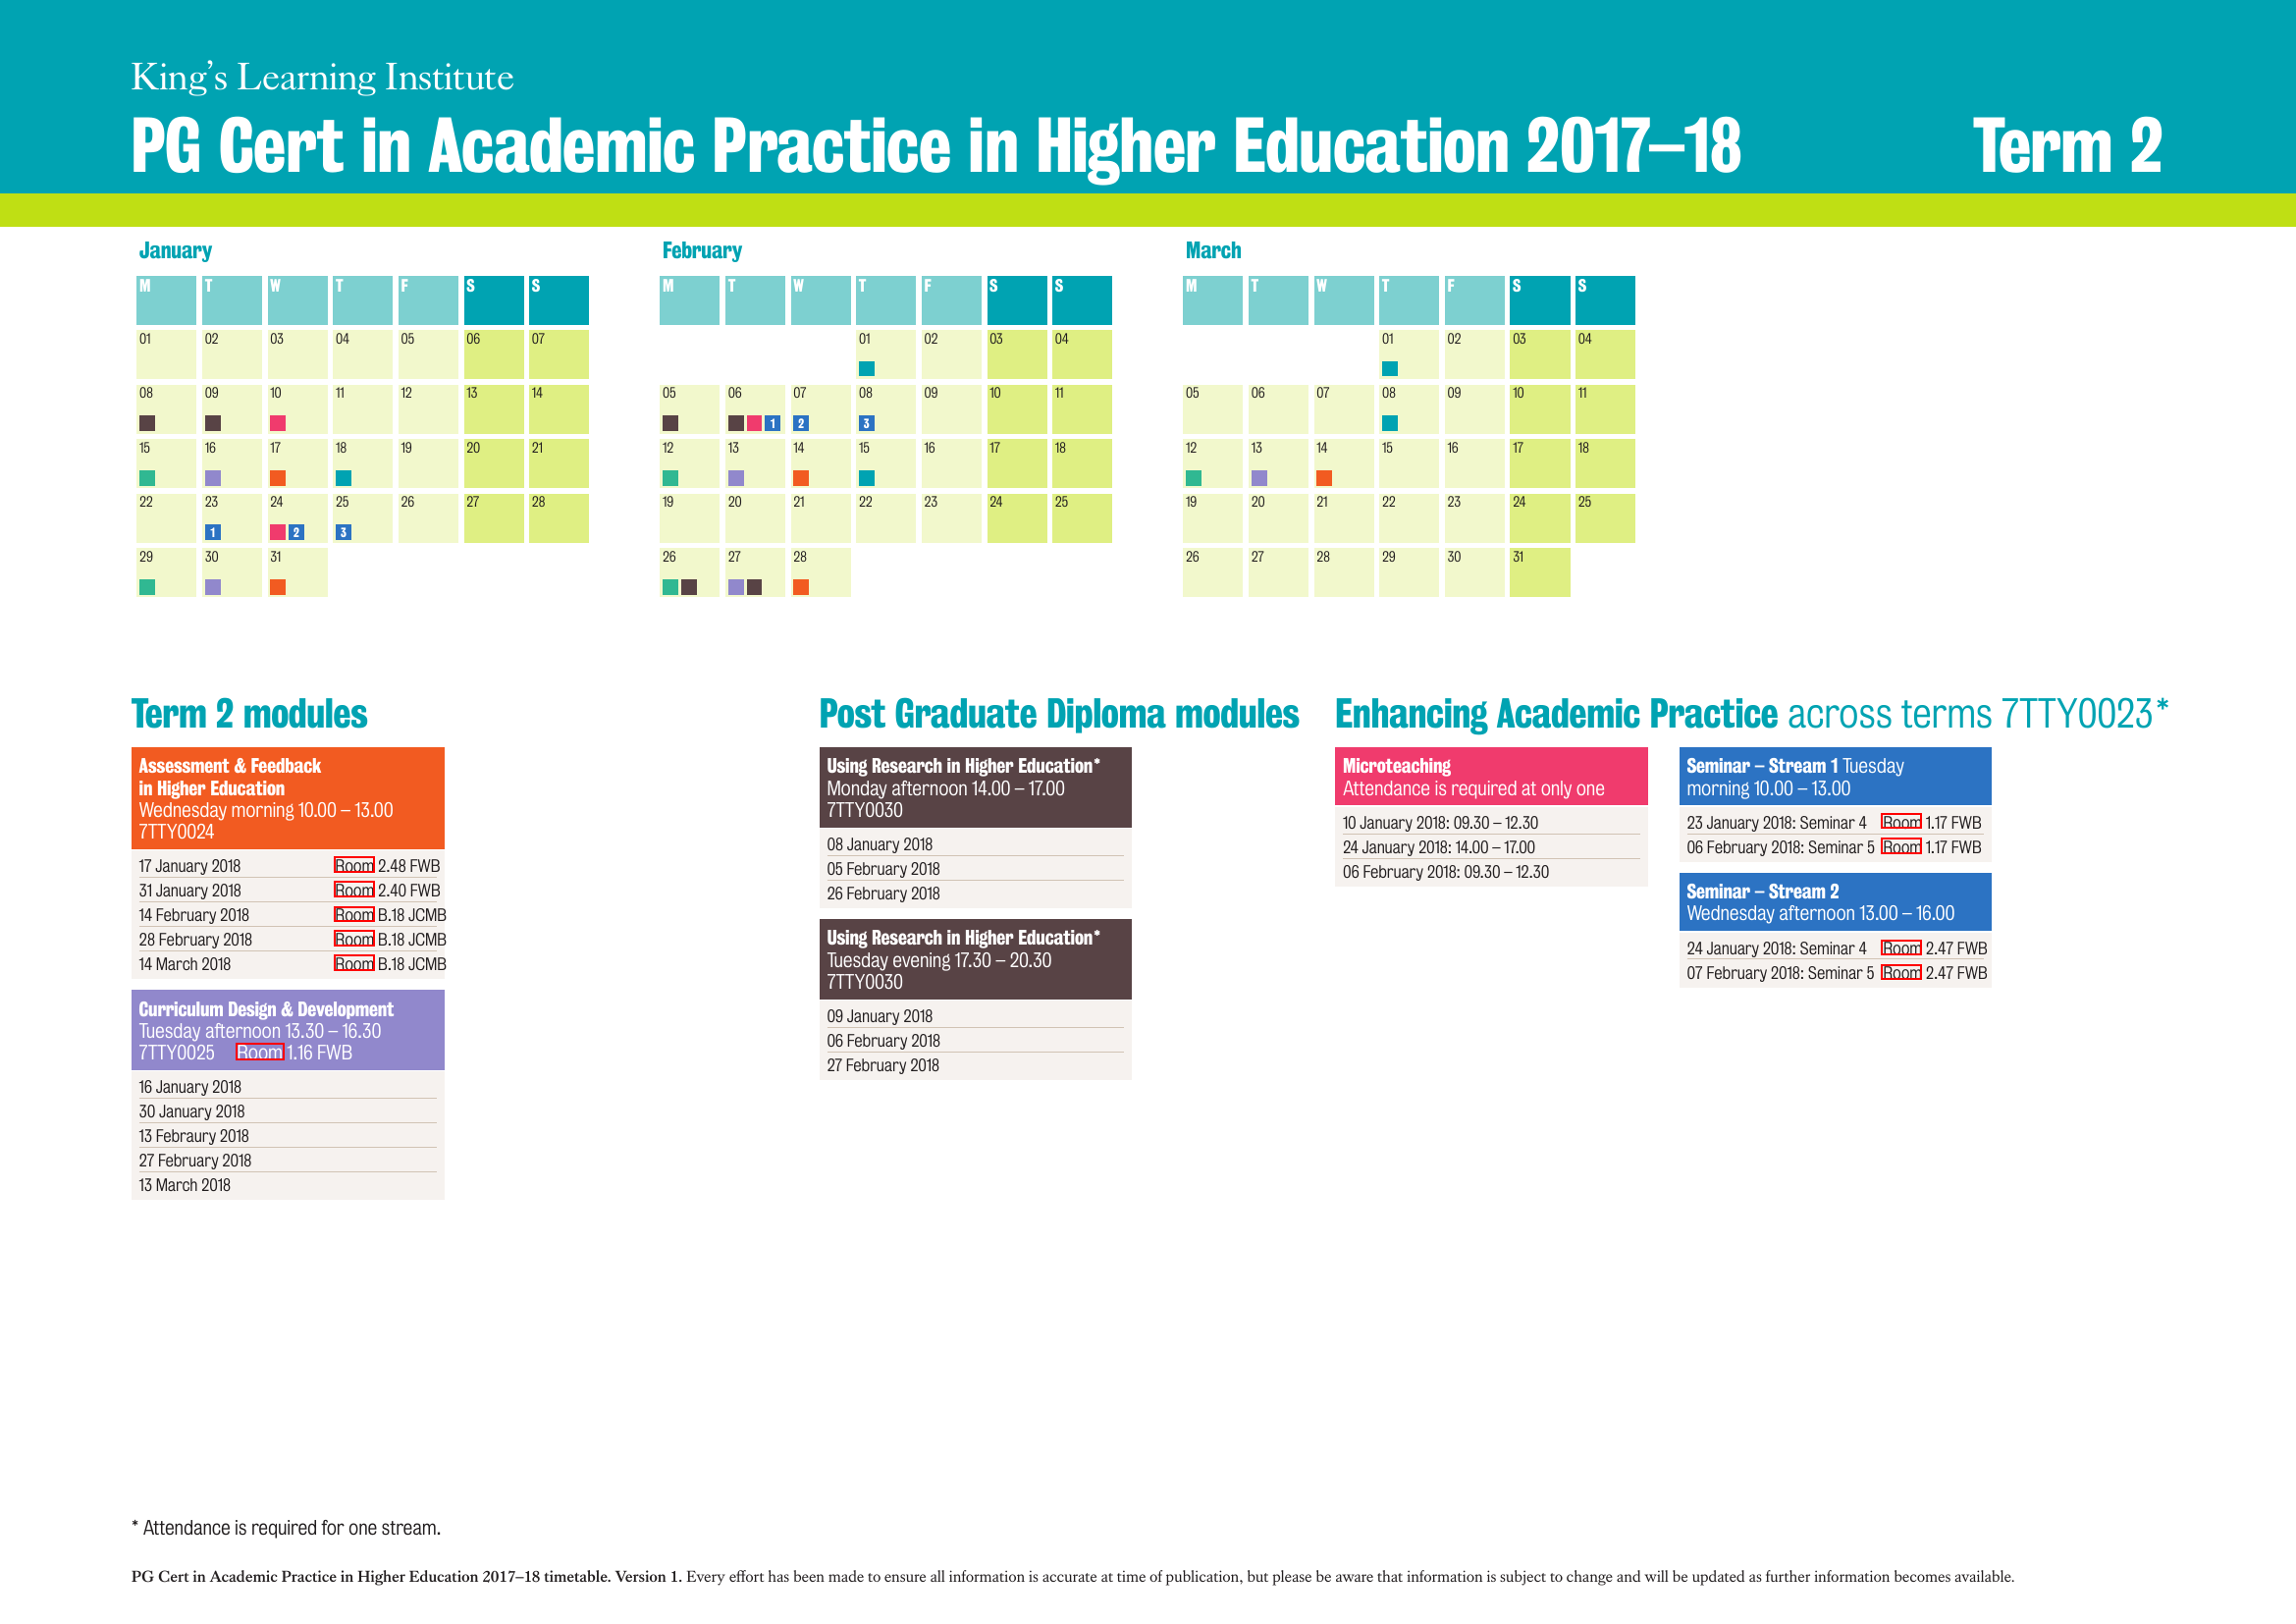

In [6]:
word_occurences.visualize()